#  Movie_Recommendation - Project 1 ◀





---



In [ ]:

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import difflib

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/Lorddhaval/Dataset/main/Movies%20Recommendation.csv')

# Check the data
print(df.head())
print(df.info())

# Select and fill features
df_features = df[['Movie_Genre', 'Movie_Keywords', 'Movie_Tagline', 'Movie_Cast', 'Movie_Director']].fillna('')

# Combine features into a single string
x = df_features['Movie_Genre'] + ' ' + df_features['Movie_Keywords'] + ' ' + df_features['Movie_Tagline'] + ' ' + df_features['Movie_Cast'] + ' ' + df_features['Movie_Director']

# Compute TF-IDF and cosine similarity
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(x)
similarity_score = cosine_similarity(x_tfidf)

# Get user input
favourite_movie_name = input('Enter your favourite movie name: ')
all_movies_title_list = df['Movie_Title'].tolist()

# Find the closest match
movie_recommendation = difflib.get_close_matches(favourite_movie_name, all_movies_title_list)
if not movie_recommendation:
    print("Movie not found in the dataset.")
else:
    close_match = movie_recommendation[0]
    print(f"Close Match: {close_match}")

    # Get the index of the movie
    index_of_close_match_movie = df[df.Movie_Title == close_match].index.values[0]

    # Get recommendation scores
    recommendation_score = list(enumerate(similarity_score[index_of_close_match_movie]))

    # Sort movies by recommendation score
    sorted_similar_movies = sorted(recommendation_score, key=lambda x: x[1], reverse=True)

    print('Top 30 Movies Suggested for You:\n')

    i = 1
    for movie in sorted_similar_movies:
        index = movie[0]
        title_from_index = df.iloc[index]['Movie_Title']
        if i <= 30:
            print(f"{i}. {title_from_index}")
            i += 1


   Movie_ID      Movie_Title                       Movie_Genre Movie_Language  \
0         1       Four Rooms                      Crime Comedy             en   
1         2        Star Wars  Adventure Action Science Fiction             en   
2         3     Finding Nemo                  Animation Family             en   
3         4     Forrest Gump              Comedy Drama Romance             en   
4         5  American Beauty                             Drama             en   

   Movie_Budget  Movie_Popularity Movie_Release_Date  Movie_Revenue  \
0       4000000         22.876230         09-12-1995        4300000   
1      11000000        126.393695         25-05-1977      775398007   
2      94000000         85.688789         30-05-2003      940335536   
3      55000000        138.133331         06-07-1994      677945399   
4      15000000         80.878605         15-09-1999      356296601   

   Movie_Runtime  Movie_Vote  ...  \
0           98.0         6.5  ...   
1          1

# Complete Handwritten Digit Classification Program - Project 2 ◀


---


Dataset Shape: (1797, 64)
Target Names: [0 1 2 3 4 5 6 7 8 9]
Sample Target Value: 1


<Figure size 640x480 with 0 Axes>

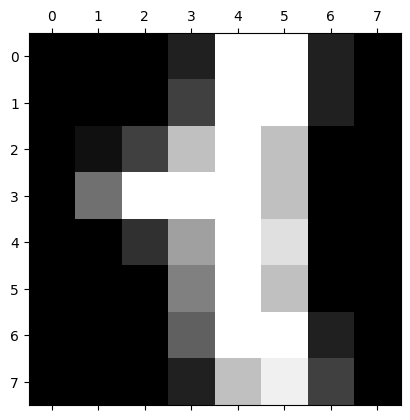

<Figure size 640x480 with 0 Axes>

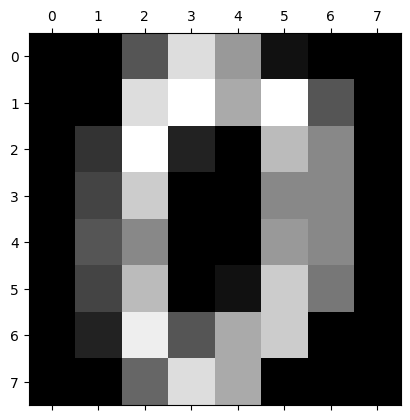

<Figure size 640x480 with 0 Axes>

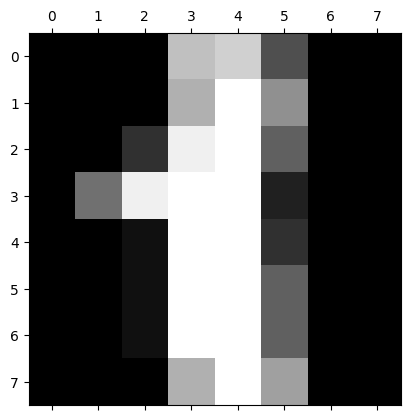

<Figure size 640x480 with 0 Axes>

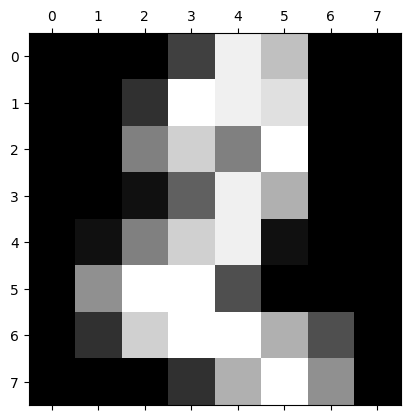

<Figure size 640x480 with 0 Axes>

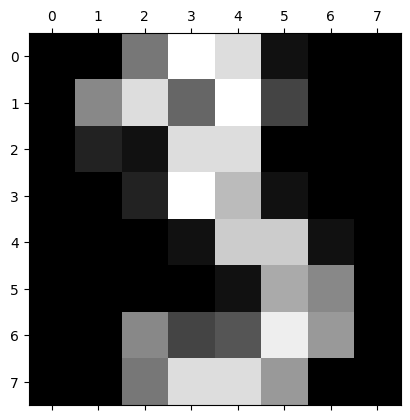

<Figure size 640x480 with 0 Axes>

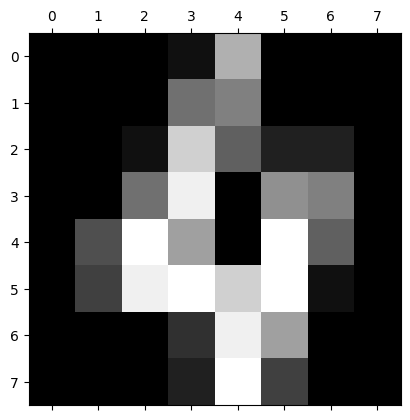

<Figure size 640x480 with 0 Axes>

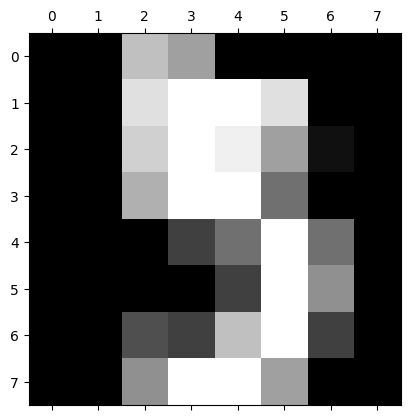

<Figure size 640x480 with 0 Axes>

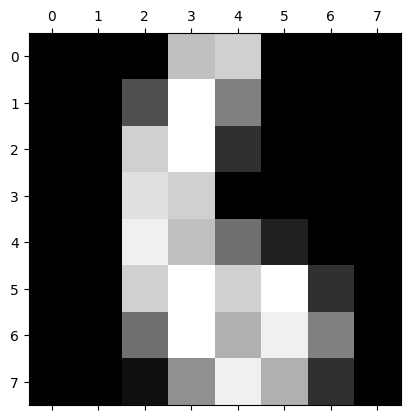

<Figure size 640x480 with 0 Axes>

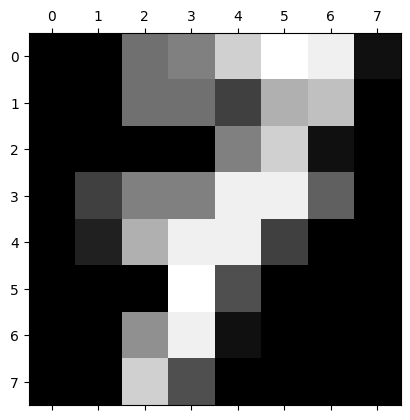

<Figure size 640x480 with 0 Axes>

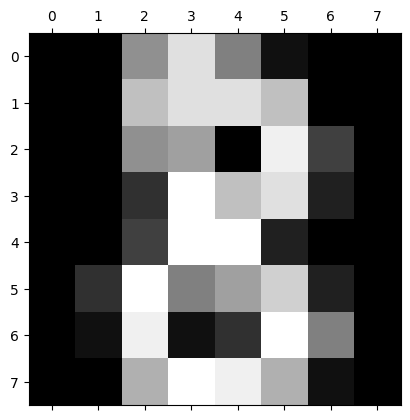

<Figure size 640x480 with 0 Axes>

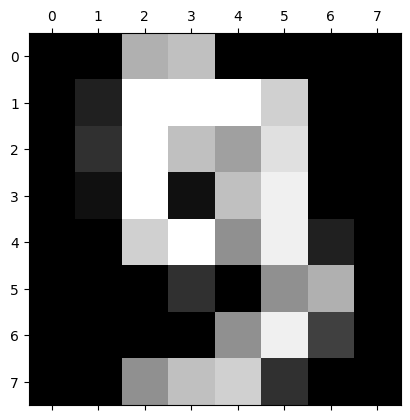

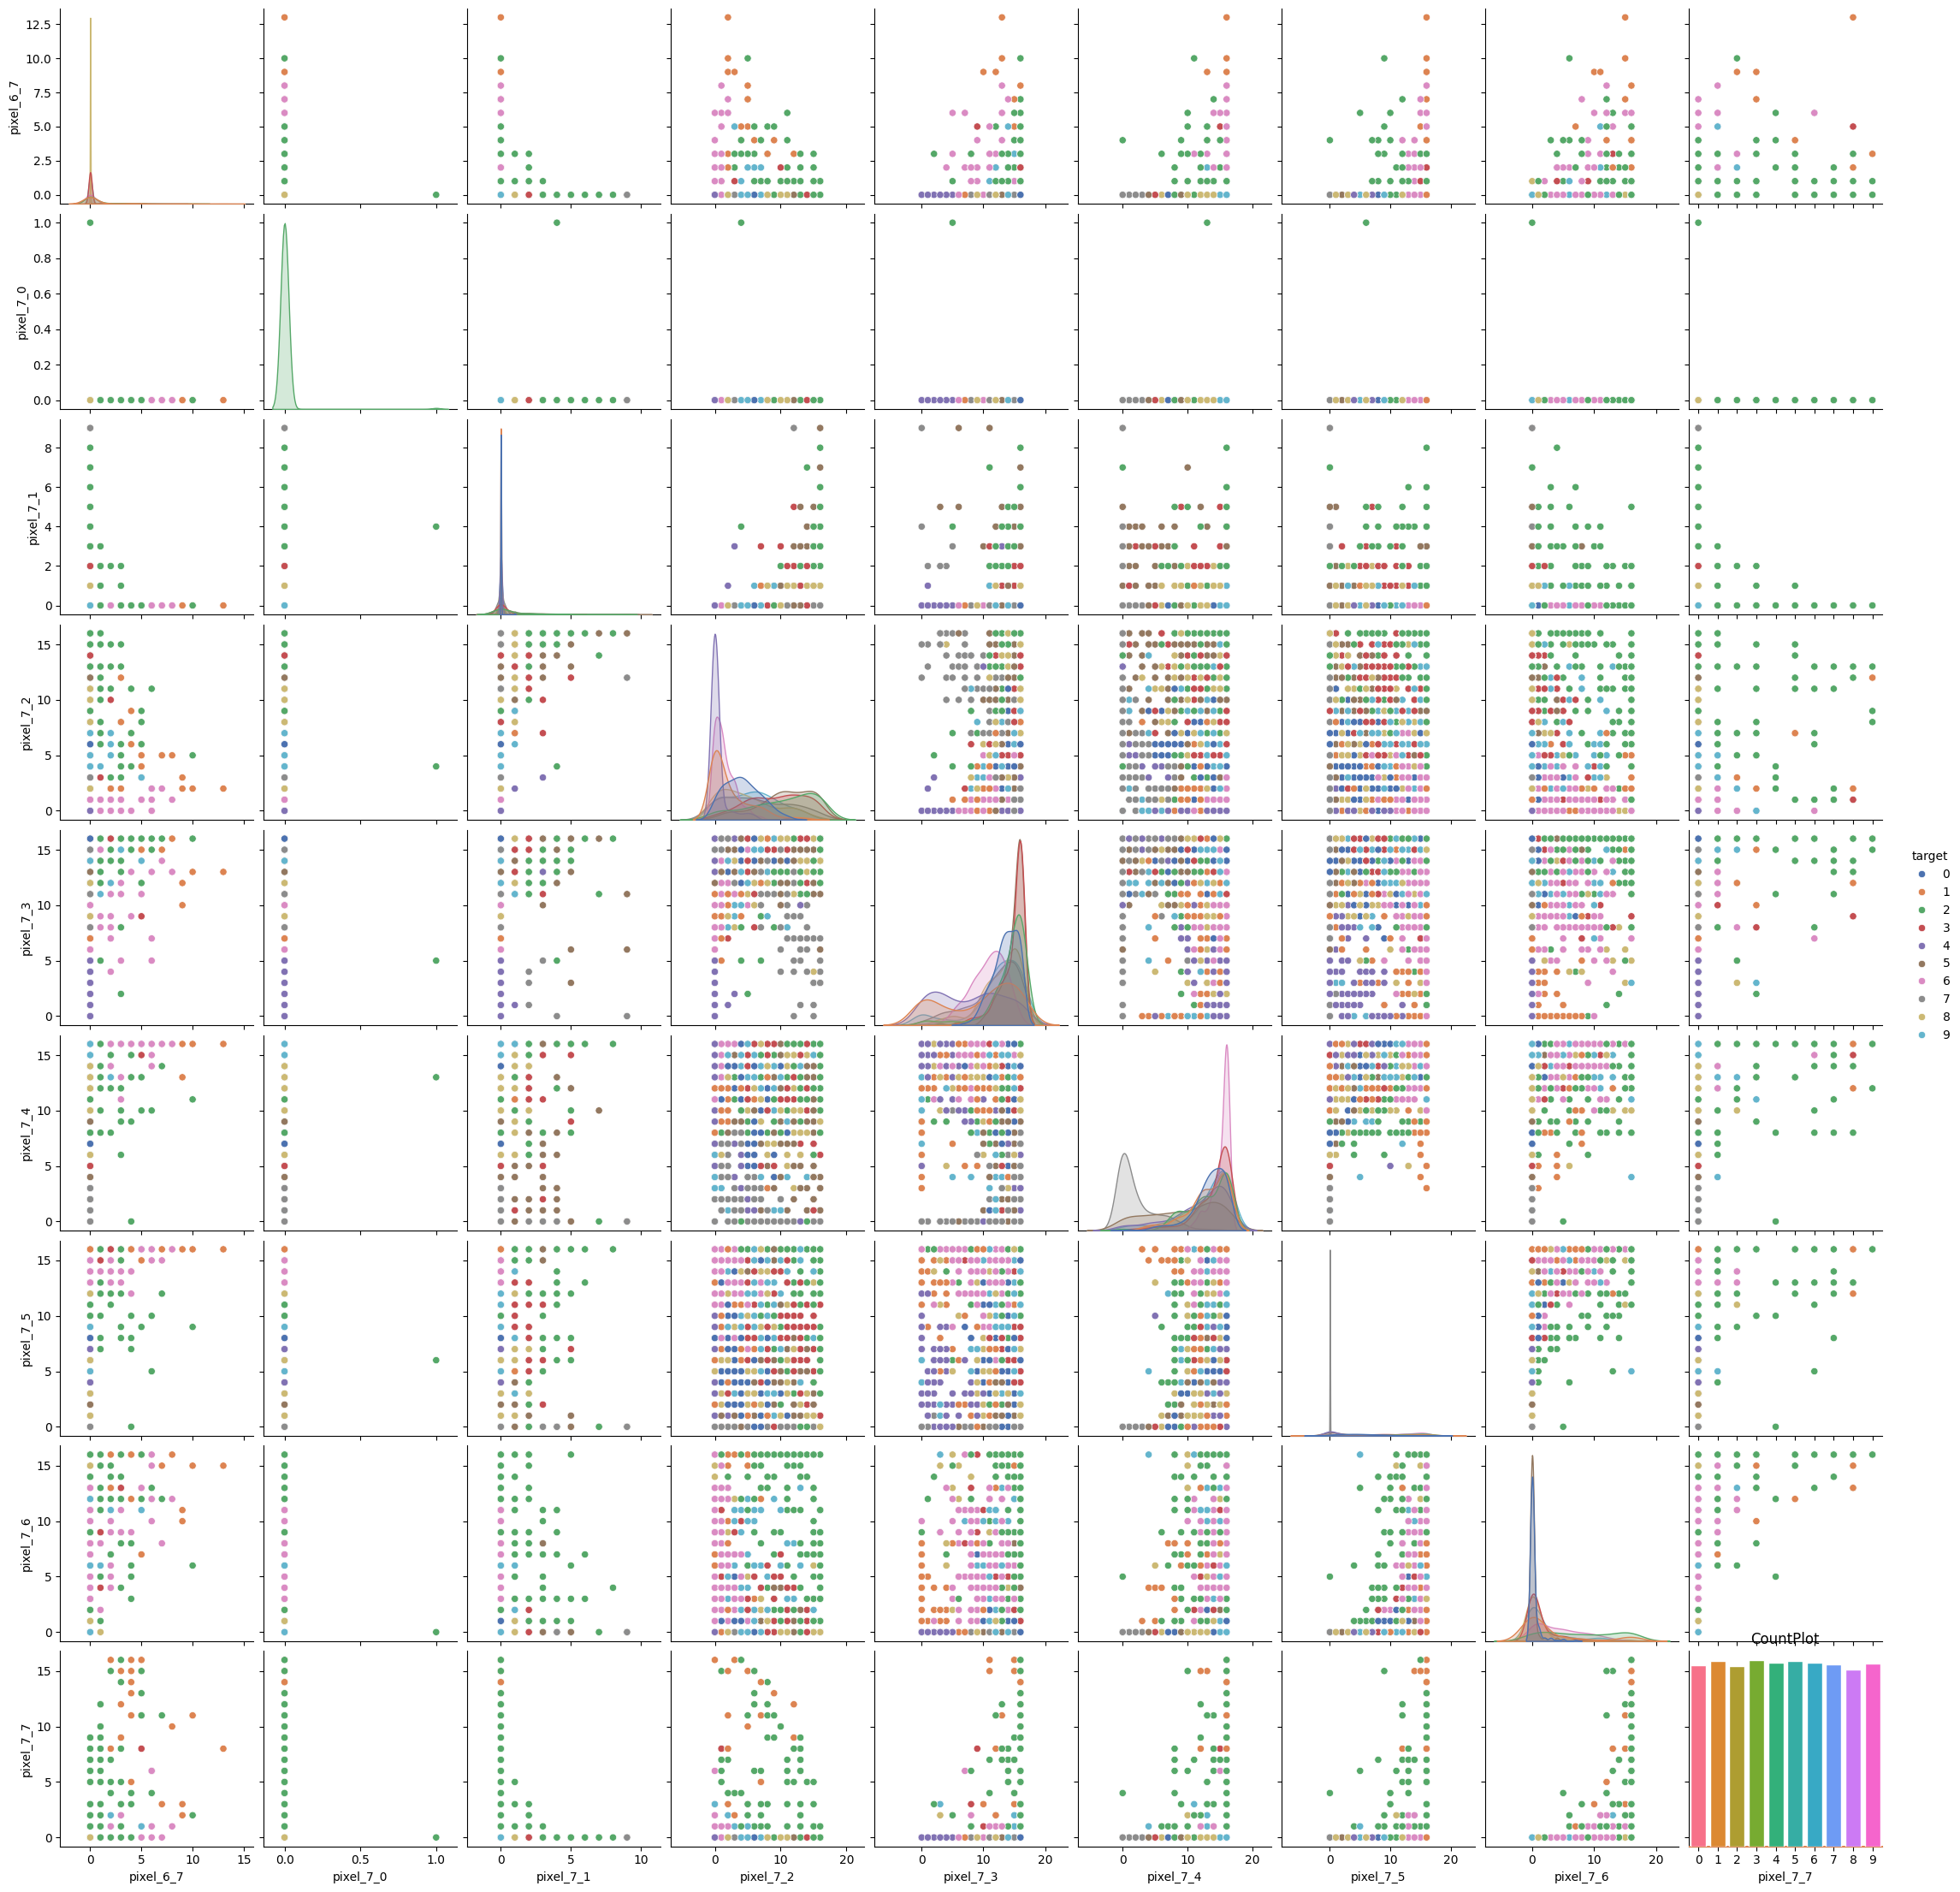

Training Set Shape: (1437, 64)
Test Set Shape: (360, 64)
Initial Model Accuracy: 0.9805555555555555
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.108 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.108 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.108 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.108 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.105 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.344 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.365 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.352 total time=   0.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.338 total time=   0.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.331 total time=   0.2s
[CV 1/5] END .....C=0.1, gam

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
digits = load_digits()

# Display basic information
print("Dataset Shape:", digits.data.shape)
print("Target Names:", digits.target_names)
print("Sample Target Value:", digits.target[21])

# Convert to DataFrame
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target

# Data visualization
plt.gray()
plt.matshow(digits.images[21])
plt.show()

for i in range(10):
    plt.gray()
    plt.matshow(digits.images[i])
    plt.show()

# Visualization of features
sns.pairplot(df.iloc[:, 55:], hue='target', palette='deep')
sns.set(style='darkgrid')
sns.countplot(x=df['target'], saturation=1, palette='husl')
plt.title('CountPlot')
plt.show()

# Split the dataset into training and test sets
x = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Training Set Shape:", x_train.shape)
print("Test Set Shape:", x_test.shape)

# Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Train SVM model
svm = SVC()
svm.fit(x_train, y_train)
print("Initial Model Accuracy:", svm.score(x_test, y_test))

# Hyperparameter tuning
C = [0.1, 1, 10, 100, 1000]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]
kernel = ['rbf']

param_grid = {
    'C': C,
    'gamma': gamma,
    'kernel': kernel
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

# Display the best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

# Test the best model
best_svm = grid.best_estimator_
print("Test Accuracy of Best Model:", best_svm.score(x_test, y_test))

# Predictions
pred = best_svm.predict(x_test)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))

print("Classification Report:")
print(classification_report(y_test, pred))

# Function to predict a handwritten digit image
def predict_digit(image):
    """
    Predicts the digit from a 64-element image vector.
    """
    image = np.array(image).reshape(1, -1)  # Reshape for a single sample
    image = scaler.transform(image)  # Standardize
    return best_svm.predict(image)[0]

# Example of how to use the predict_digit function
example_image = x_test[0]  # Take an example from the test set
print("Predicted Digit:", predict_digit(example_image))


# BANK CUSTOMER CHURN MODEL - Project 3 ◀


---








In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Load the dataset
df = pd.read_csv("Churn_Modelling.csv")

# Display the first few rows
print(df.head())

# Display data types
print(df.dtypes)

# Create a copy of the data
data = df.copy()
print(data.shape)

# Perform Univariate Analysis
print(df['Gender'].value_counts())
sns.scatterplot(x=df.index, y=df["Gender"])
plt.title('Univariate Analysis for Gender')
plt.show()

print(df['Age'].value_counts())
sns.histplot(df.Age, kde=True)
plt.title('Univariate Analysis for Age')
plt.show()

print(df['Geography'].value_counts())
sns.scatterplot(x=df.index, y=df["Geography"])
plt.title('Univariate Analysis for Geography')
plt.show()

print(df['HasCrCard'].value_counts())
sns.histplot(df.HasCrCard, kde=True)
plt.title('Univariate Analysis for HasCrCard')
plt.show()

print(df['IsActiveMember'].value_counts())
sns.histplot(df.IsActiveMember, kde=True)
plt.title('Univariate Analysis for IsActiveMember')
plt.show()

# Perform Bivariate Analysis
plt.hist(x=df.Gender, bins=3, color='navy')
plt.title('Comparison of Male and Female')
plt.xlabel('Gender')
plt.ylabel('Population')
plt.show()

plt.hist(x=df.Age, bins=10, color='orange')
plt.title('Comparison of Age')
plt.xlabel('Age')
plt.ylabel('Population')
plt.show()

plt.hist(x=df.Geography, bins=5, color='green')
plt.title('Comparison of Geography')
plt.xlabel('Geography')
plt.ylabel('Population')
plt.show()

plt.hist(x=df.HasCrCard, bins=3, color='red')
plt.title('How Many People Have or Not Have the Credit Card')
plt.xlabel('Customers Holding Credit Card')
plt.ylabel('Population')
plt.show()

plt.hist(x=df.IsActiveMember, bins=3, color='brown')
plt.title('Active Members')
plt.xlabel('Customers')
plt.ylabel('Population')
plt.show()

# Comparison of different features
Gender = pd.crosstab(df['Gender'], df['Geography'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6))
plt.title('Comparison of Gender by Geography')
plt.show()

HasCrCard = pd.crosstab(df['HasCrCard'], df['Geography'])
HasCrCard.div(HasCrCard.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6, 6))
plt.title('Comparison of HasCrCard by Geography')
plt.show()

IsActiveMember = pd.crosstab(df['IsActiveMember'], df['Geography'])
IsActiveMember.div(IsActiveMember.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6, 6))
plt.title('Comparison of Active Member by Geography')
plt.show()

Age = pd.crosstab(df['Age'], df['Geography'])
Age.div(Age.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15, 15))
plt.title('Comparison of Age by Geography')
plt.show()

# Calculate total balance by geography
total_france = df.Balance[df.Geography == 'France'].sum()
total_germany = df.Balance[df.Geography == 'Germany'].sum()
total_spain = df.Balance[df.Geography == 'Spain'].sum()

print("Total Balance in France :", total_france)
print("Total Balance in Germany :", total_germany)
print("Total Balance in Spain :", total_spain)

# Pie chart for total balance by geography
labels = 'France', 'Germany', 'Spain'
colors = ['red', 'orange', 'yellow']
sizes = [total_france, total_germany, total_spain]
explode = [0.01, 0.01, 0.01]

plt.pie(sizes, colors=colors, labels=labels, explode=explode, shadow=True)
plt.axis('equal')
plt.title('Total Balance by Geography')
plt.show()

# Multivariate Analysis
plt.figure(figsize=(20, 20))
fig = px.scatter_3d(df, x='IsActiveMember', y='Age', z='Exited', color='Geography')
fig.update_layout(title='Multivariate Analysis of IsActiveMember, Age, Exited, and Geography')
fig.show()

# Pairplot Analysis
sns.pairplot(df, hue='Geography', height=2)
plt.title('Pairplot Analysis of Geography')
plt.show()

# Descriptive Statistics
print(df.describe())

# Drop unnecessary columns
data = df.drop(['CustomerId', 'Surname', 'RowNumber'], axis=1)
print(data.columns)

# Check for missing values
print(df.isnull().sum())

# Handle Outliers
sns.boxplot(df['Age'])
plt.title('Boxplot for Age')
plt.show()

df['Age'].hist()
plt.title('Histogram for Age')
plt.show()

# Skewness
print('Skewness value of Age:', df['Age'].skew())
print('Skewness value of NumOfProducts:', df['NumOfProducts'].skew())
print('Skewness value of EstimatedSalary:', df['EstimatedSalary'].skew())
print('Skewness value of Tenure:', df['Tenure'].skew())

# Outliers Treatment
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
df['Age'] = np.where(df['Age'] > upper_whisker, upper_whisker, np.where(df['Age'] < lower_whisker, lower_whisker, df['Age']))
sns.boxplot(df['Age'])
plt.title('Boxplot for Age After Outliers Treatment')
plt.show()

# Encoding Categorical Variables
gender_dummies = df.replace(to_replace={'Gender': {'Female': 0, 'Male': 1}})
a = pd.get_dummies(df['Geography'], prefix="Geo_dummy")
frames = [gender_dummies, a]
df = pd.concat(frames, axis=1)
df = df.drop(["RowNumber", "Geography", "Surname", "CustomerId", 'Age', 'Geography', "CreditScore"], axis=1)
print(df.head())

# Split the data into dependent and independent variables
X = df.drop(columns=['Exited'])
y = df['Exited']
print(X.shape)
print(y.shape)

# Scaling the independent variables
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print(X_scaled.head())

# Splitting the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Save the processed data
X_scaled.to_csv('X_scaled.csv', index=False)
y.to_csv('y.csv', index=False)


Output hidden; open in https://colab.research.google.com to view.